In [1]:
import csv
import sklearn.feature_extraction.text as txt
from urllib.parse import urlparse
import re

import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer

import seaborn as sns
from collections import Counter

In [2]:
RAW_ARTICLES = "../text-mining-project-data/dirty/raw-article-data.csv"

In [3]:
raw_articles = []
with open(RAW_ARTICLES) as f:
    reader = csv.reader(f, delimiter=",")
    for row in reader:
        raw_articles.append(row)

In [4]:
def remove_text(text_excerpt: str, punctuation_to_remove: list):
    for punc in punctuation_to_remove:
        text_excerpt = text_excerpt.replace(punc, "")
        
    return text_excerpt

In [5]:
text_list = [
    "ap", "photos", "’", "‘", ":", "1", "2", "3", "4", "5", "6", "7", "8", "_" "9", "0", "–", ".", "'", "-", "”", 
    "”", "“", "?", "“", "–", "/", "blasts", "skip", "advertisement", "directly", "free", "subscribe", 
    "breaking news", "informed", "receive", "share", "post", "news", "inbox", "mother", "jones", "sign", "daily",
    "follow", "newsletter", "disinformation", "getty", "images", "said", "told", "new", "httpswwwoanncomalerts", 
    "like", "says", "oan", "abril", "elfi", "according", "___"
]


# Clean titles and article text
titles = [remove_text(entry[1].lower().replace("“", ""), text_list) for entry in raw_articles]

article_bodies = [remove_text(entry[2].lower().replace("“", ""), text_list) for entry in raw_articles]
article_bodies = [re.sub("[0-9]", "", entry) for entry in article_bodies]

In [6]:
with open("remove_words.txt", "w") as f:
    for word in text_list:
        f.write(word)
        f.write("\n")

In [7]:
urls = [urlparse(entry[0]).netloc for entry in raw_articles]
counts = Counter(urls)
reduced_counts = {}

for key, value in counts.items():
    if value > 30:
        reduced_counts[key] = value

reduced_counts

{'www.nytimes.com': 50,
 'nypost.com': 977,
 'www.motherjones.com': 1001,
 'apnews.com': 393,
 'www.oann.com': 204}

In [8]:
urls

['www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',
 'www.nytimes.com',


In [9]:
"../text-mining-project-data/dirty/raw-article-data.csv"
df.to_csv("../text-mining-project-data/dirty/reduced-raw-article-data.csv")

NameError: name 'df' is not defined

In [11]:
left = ["www.nytimes.com", "www.motherjones.com", "apnews.com"]
right = ["www.oann.com", "nypost.com"]
both_sides = left + right

In [12]:
raw_articles_df = pd.DataFrame(raw_articles, columns=["url","title", "content"])

raw_articles_df["partial-url"] = urls
raw_articles_df = raw_articles_df[np.isin(raw_articles_df["partial-url"], both_sides)]
raw_articles_df = raw_articles_df.drop("partial-url", axis=1)
raw_articles_df.to_csv("../text-mining-project-data/dirty/reduced-raw-article-data.csv", index=False)

In [13]:
clean_data = [[url, article_body] for url, article_body in zip(urls, article_bodies)]
df = pd.DataFrame(clean_data, columns=["url", "article-text"])
df = df[np.isin(df["url"], both_sides)]
set(df["url"])

{'apnews.com',
 'nypost.com',
 'www.motherjones.com',
 'www.nytimes.com',
 'www.oann.com'}

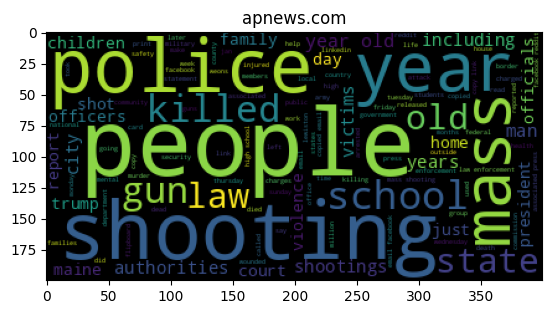

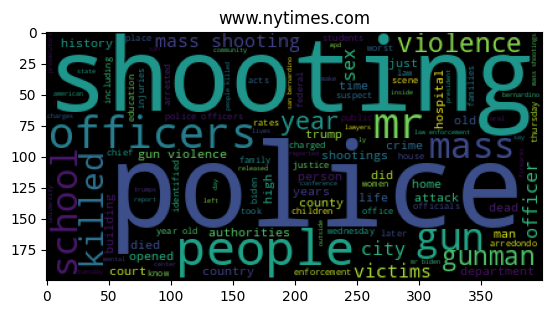

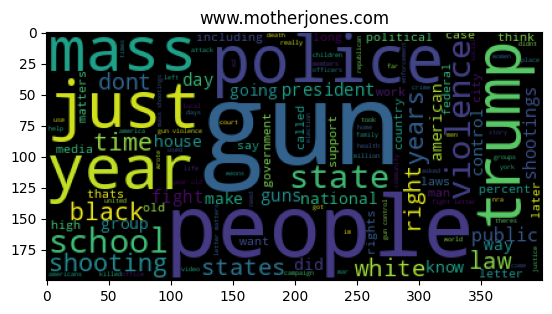

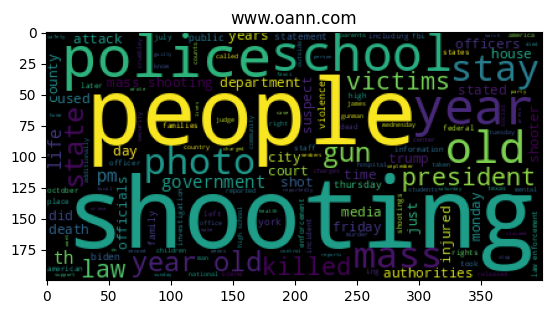

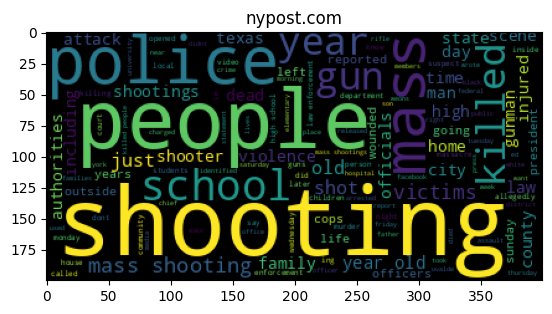

In [14]:
for source in set(df["url"]):
    new_df = df[df["url"] == source]
    count_vec = txt.CountVectorizer(
        input="content", stop_words="english", max_features=1000, ngram_range=(1, 2))
    count_out = count_vec.fit_transform(list(new_df["article-text"])).toarray()
    count_df = pd.DataFrame(count_out, columns=count_vec.get_feature_names_out())
    count_summed = count_df.sum(axis=0, numeric_only=True)
    wordcloud = WordCloud().generate_from_frequencies(count_summed)
    plt.title(source)
    plt.imshow(wordcloud)
    plt.show()

In [15]:
stemmer = PorterStemmer()
lemmer = WordNetLemmatizer()

stemmed_articles = []
lemmed_articles = []

for i, article in enumerate(article_bodies):
    art_list = article.split(" ")
    stem_list = [stemmer.stem(word) for word in art_list]
    lem_list = [lemmer.lemmatize(word) for word in art_list]
    
    stemmed_articles.append(" ".join(stem_list))
    lemmed_articles.append(" ".join(lem_list))

In [16]:
reg_vec = txt.CountVectorizer(input="content", stop_words="english", min_df=0.1, max_df=0.8, max_features=1000)
lem_vec = txt.CountVectorizer(input="content", stop_words="english", min_df=0.1, max_df=0.8, max_features=1000)
stem_vec = txt.CountVectorizer(input="content", stop_words="english", min_df=0.1, max_df=0.8, max_features=1000)

reg_out = reg_vec.fit_transform(article_bodies).toarray()
lem_out = lem_vec.fit_transform(lemmed_articles).toarray()
stem_out = stem_vec.fit_transform(stemmed_articles).toarray()

In [17]:
reg_df = pd.DataFrame(reg_out, columns=reg_vec.get_feature_names_out())
lem_df = pd.DataFrame(lem_out, columns=lem_vec.get_feature_names_out())
stem_df = pd.DataFrame(stem_out, columns=stem_vec.get_feature_names_out())

In [18]:
labels = []

In [19]:
reg_summed = reg_df.sum(axis=0, numeric_only=True)
lem_summed = lem_df.sum(axis=0, numeric_only=True)
stem_summed = stem_df.sum(axis=0, numeric_only=True)

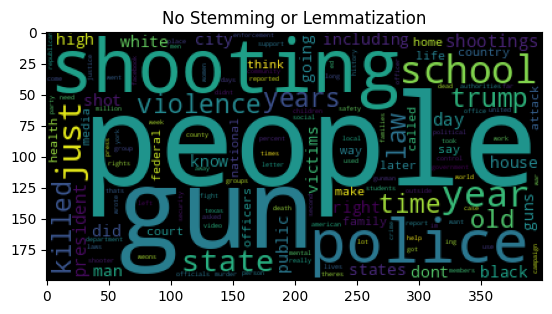

In [20]:
wordcloud = WordCloud().generate_from_frequencies(reg_summed)
plt.title("No Stemming or Lemmatization")
plt.imshow(wordcloud)

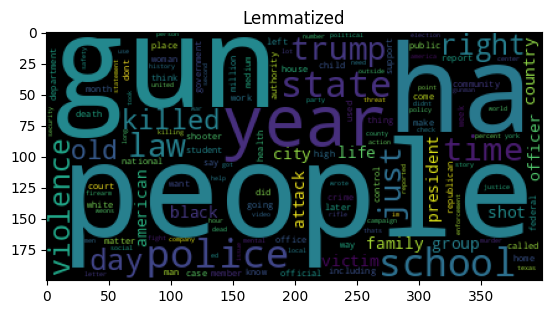

In [21]:
wordcloud = WordCloud().generate_from_frequencies(lem_summed)
plt.title("Lemmatized")
plt.imshow(wordcloud)

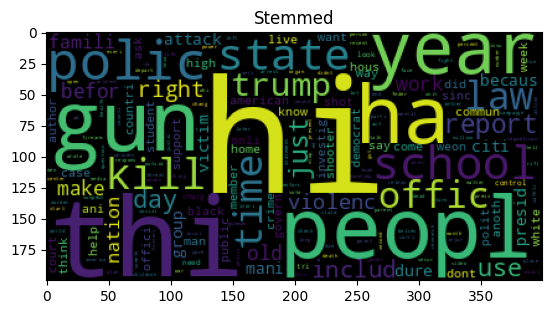

In [22]:
wordcloud = WordCloud().generate_from_frequencies(stem_summed)
plt.title("Stemmed")
plt.imshow(wordcloud)

In [23]:
df

,url,article-text
0,www.nytimes.com,the swedish authorities on thursday that they...
1,www.nytimes.com,a shooting at an adult education campus in cen...
2,www.nytimes.com,instead ms laird a family law specialist with ...
3,www.nytimes.com,it was about on a gray tuesday in orebro swe...
4,www.nytimes.com,salim iskef had just bought a house and his up...
...,...,...
2844,www.motherjones.com,fight up for the letter and the that m...
2845,www.motherjones.com,fight up for the letter and the that m...
2846,www.motherjones.com,fight up for the letter and the that m...
2847,www.motherjones.com,in his response to the town mass shooting ...


In [24]:
df["label"] = df["url"].apply(lambda x: "right" if x in right else "left")
df = df.drop("url", axis=1)
df = df[["label", "article-text"]]
df.to_csv("labeled-article-text.csv")
df

,label,article-text
0,left,the swedish authorities on thursday that they...
1,left,a shooting at an adult education campus in cen...
2,left,instead ms laird a family law specialist with ...
3,left,it was about on a gray tuesday in orebro swe...
4,left,salim iskef had just bought a house and his up...
...,...,...
2844,left,fight up for the letter and the that m...
2845,left,fight up for the letter and the that m...
2846,left,fight up for the letter and the that m...
2847,left,in his response to the town mass shooting ...


Text(0.5, 1.0, 'Number of Articles from Right and Left Sources')

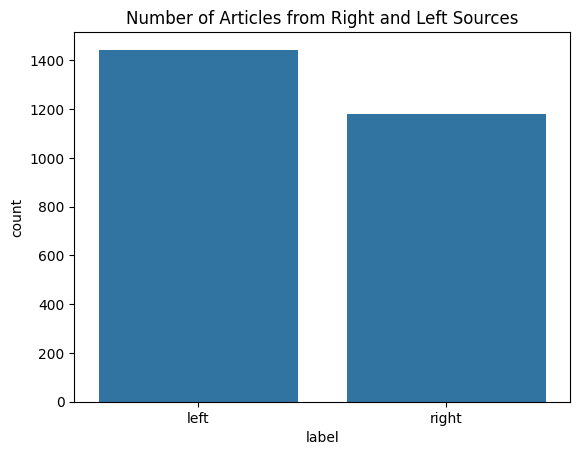

In [25]:
sns.countplot(df, x="label")
plt.title("Number of Articles from Right and Left Sources")

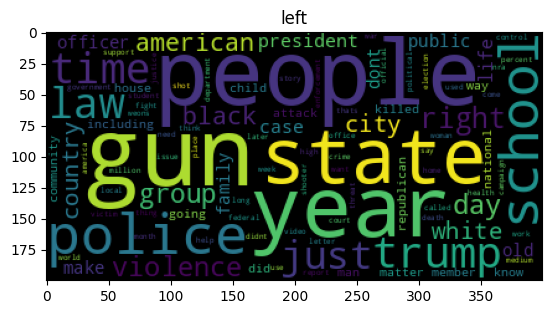

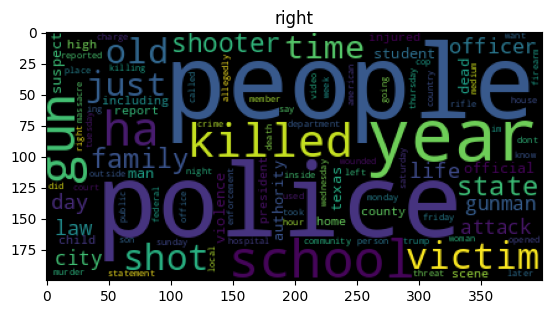

In [26]:
df_dict = {}
for source in set(df["label"]):
    new_df = df[df["label"] == source]
    count_vec = txt.CountVectorizer(
        input="content", stop_words="english", max_features=100, max_df=0.8, ngram_range=(1, 1))
    
    lemmed_articles = []
    for article in list(new_df["article-text"]):
        art_list = article.split(" ")
        lem_list = [lemmer.lemmatize(word) for word in art_list]
        lemmed_articles.append(" ".join(lem_list))
    
    count_out = count_vec.fit_transform(lemmed_articles).toarray()
    count_df = pd.DataFrame(count_out, columns=count_vec.get_feature_names_out())
    count_summed = count_df.sum(axis=0, numeric_only=True)
    wordcloud = WordCloud().generate_from_frequencies(count_summed)
    plt.title(source)
    plt.imshow(wordcloud)
    plt.show()

In [27]:
stemmed_articles = []

# for i, article in enumerate(list(df["article-text"])):
#     art_list = article.split(" ")
#     stem_list = [lemmer.lemmatize(word) for word in art_list]
    
#     stemmed_articles.append(" ".join(stem_list))

# df["article-text"] = stemmed_articles
count_vec = txt.CountVectorizer(
        input="content", stop_words="english", max_features=500, max_df=0.8, ngram_range=(1, 1))
    
count_out = count_vec.fit_transform(list(df["article-text"])).toarray()
count_df = pd.DataFrame(count_out, columns=count_vec.get_feature_names_out())
labels = ["labels"]
for word in count_vec.get_feature_names_out():
    labels.append(word)
    
label_list = list(df["label"])

count_df = pd.concat((pd.Series(label_list), count_df), axis=1)
count_df.columns = labels
count_df.to_csv("../text-mining-project-data/clean/count-500.csv", index=False)

In [28]:
count_vec = txt.CountVectorizer(
        input="content", stop_words="english", min_df = 0.01, max_df=0.7, ngram_range=(1, 1))
    
count_out = count_vec.fit_transform(list(df["article-text"])).toarray()
count_df = pd.DataFrame(count_out, columns=count_vec.get_feature_names_out())
labels = ["labels"]
for word in count_vec.get_feature_names_out():
    labels.append(word)
    
label_list = list(df["label"])

count_df = pd.concat((pd.Series(label_list), count_df), axis=1)
count_df.columns = labels

In [29]:
count_df

,labels,aaron,abandoned,abbott,abc,abiding,ability,able,abortion,abroad,...,younger,youngest,youre,youth,youtube,youve,zealand,zero,zone,zones
0,left,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,left,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,left,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,left,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,left,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,left,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2621,left,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2622,left,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2623,left,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
count_df.to_csv("../text-mining-project-data/clean/count-4856.csv", index=False)

In [31]:
df_nolab = 

,label,article-text
0,left,the swedish authorities on thursday that they...
1,left,a shooting at an adult education campus in cen...
2,left,instead ms laird a family law specialist with ...
3,left,it was about on a gray tuesday in orebro swe...
4,left,salim iskef had just bought a house and his up...
...,...,...
2844,left,fight up for the letter and the that m...
2845,left,fight up for the letter and the that m...
2846,left,fight up for the letter and the that m...
2847,left,in his response to the town mass shooting ...
